In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["font.size"] = 14


In [125]:
df = pd.read_csv("online_shoppers_intention.csv")

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# preprocessing

In [126]:
df.shape

(12330, 18)

 around 12K rows

In [127]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [128]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

no missing values

In [129]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### heatmap

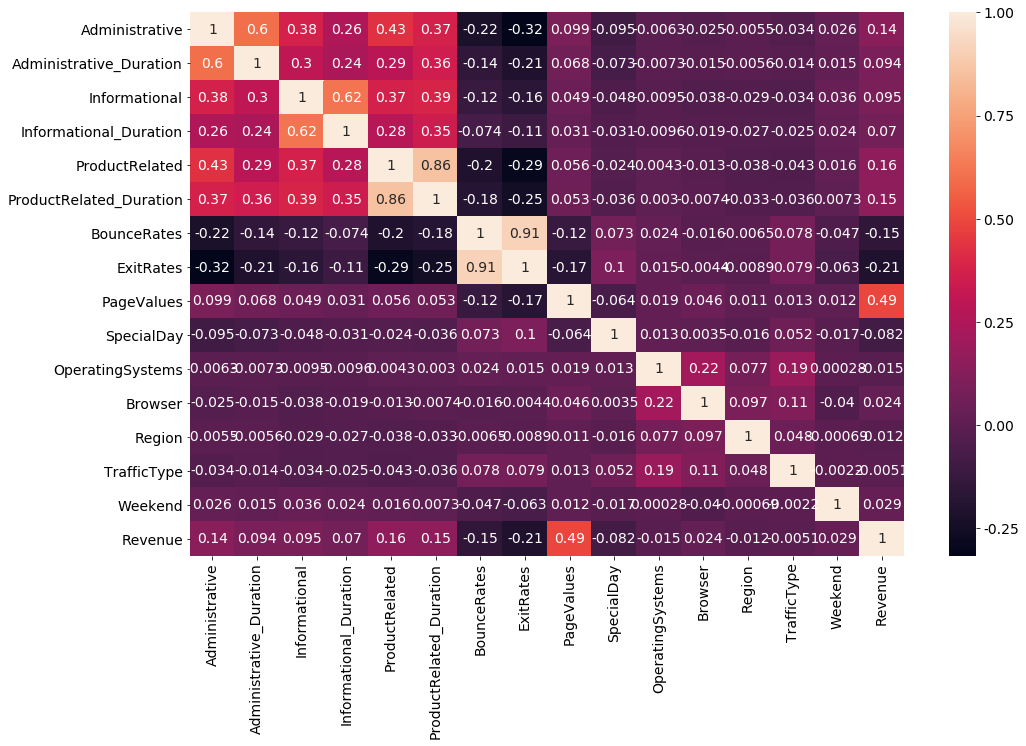

In [130]:
sns.heatmap(df.corr(),annot=True)

### drop the columns which are not useful

In [131]:
df = df.drop(["OperatingSystems", "Browser", "TrafficType"], 1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,1,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,9,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,2,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,1,Returning_Visitor,True,False


### one hot encoding

In [132]:
cat_use = pd.get_dummies(pd.Categorical(df["Month"]), prefix="Month")
df = pd.concat([df, cat_use], axis=1)
df = df.drop("Month", 1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [133]:
cat_use = pd.get_dummies(pd.Categorical(df["VisitorType"]), prefix="VisitorType")
df = pd.concat([df, cat_use], axis=1)
df = df.drop("VisitorType", 1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [134]:
map_ = {False : 0, True :1}
df['Weekend'] = df['Weekend'].map(map_)
df["Revenue"] = df["Revenue"].map(map_)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


Text(0,0.5,'quantity')

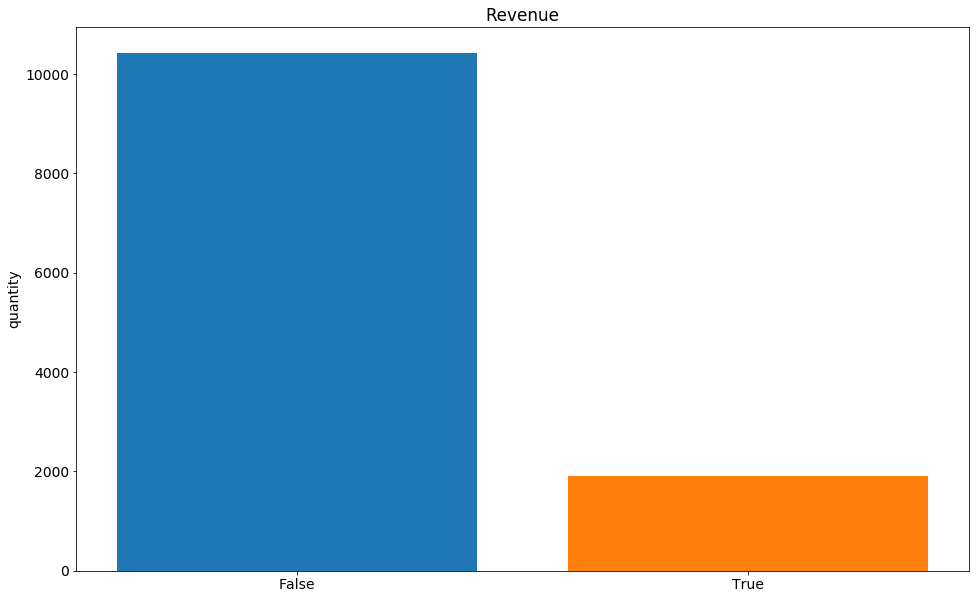

In [135]:
plt.bar(["False", "True"], [(df["Revenue"] == 0).sum(), (df["Revenue"] == 1).sum()], color=["tab:blue", "tab:orange"])
plt.title("Revenue")
plt.ylabel("quantity")

### heatmap correlation

In [136]:
np.abs(df.corr()["Revenue"]).sort_values()

Month_Jul                        0.001036
VisitorType_Other                0.007715
Month_Aug                        0.010959
Region                           0.011595
Month_Sep                        0.019983
Month_June                       0.023112
Weekend                          0.029295
Month_Oct                        0.032666
Month_Dec                        0.033112
Month_Feb                        0.047114
Month_Mar                        0.063941
Informational_Duration           0.070345
Month_May                        0.078320
SpecialDay                       0.082305
Administrative_Duration          0.093587
Informational                    0.095200
VisitorType_Returning_Visitor    0.103843
VisitorType_New_Visitor          0.104136
Administrative                   0.138917
BounceRates                      0.150673
ProductRelated_Duration          0.152373
Month_Nov                        0.154774
ProductRelated                   0.158538
ExitRates                        0

the correlation of pageValues to revenue is almost 50%, it must be the most important feature in the data

### drop the features that correlation to revenue are smaller than 0.01

In [137]:
df = df.drop(["Month_Jul", "VisitorType_Other"], 1)

### final dataframe

In [100]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Dec,Month_Feb,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Returning_Visitor
65,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,...,0,1,0,0,0,0,0,0,0,1
76,10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,...,0,1,0,0,0,0,0,0,0,1
101,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,...,0,1,0,0,0,0,0,0,0,1
188,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,...,0,0,0,1,0,0,0,0,0,1
196,2,56.000000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,...,0,0,0,1,0,0,0,0,1,0


# Model fitting and evaluation

In [138]:
df = df.sample(frac=1)
y = df["Revenue"]
df = df.drop("Revenue", 1)

### data splitting

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)

### data normalization

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)

### Model selection

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names = ["KNeighbor", "Decision tree", "Random Forest", "SGD", "Logistic", "LinearSVC", "XGboost", "LGB"]
classifiers = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), SGDClassifier(), LogisticRegression(), LinearSVC(), XGBClassifier(), LGBMClassifier()]

models = zip(names, classifiers)

for name, mo in models:
    model = mo
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print("{}: ACC: {}".format(name, accuracy))
    print(classification_report(model.predict(X_test), y_test))

KNeighbor: ACC: 0.8819331819656179
             precision    recall  f1-score   support

          0       0.97      0.90      0.93      2781
          1       0.44      0.73      0.55       302

avg / total       0.92      0.88      0.89      3083

Decision tree: ACC: 0.8650664936749919
             precision    recall  f1-score   support

          0       0.92      0.92      0.92      2587
          1       0.58      0.58      0.58       496

avg / total       0.87      0.87      0.87      3083

Random Forest: ACC: 0.8913396042815439
             precision    recall  f1-score   support

          0       0.97      0.91      0.94      2766
          1       0.48      0.76      0.59       317

avg / total       0.92      0.89      0.90      3083

SGD: ACC: 0.8738241972105092
             precision    recall  f1-score   support

          0       0.97      0.89      0.93      2830
          1       0.36      0.72      0.48       253

avg / total       0.92      0.87      0.89      3083

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Logistic: ACC: 0.8842036976970483
             precision    recall  f1-score   support

          0       0.98      0.89      0.93      2850
          1       0.38      0.81      0.51       233

avg / total       0.94      0.88      0.90      3083

LinearSVC: ACC: 0.8793383068439832
             precision    recall  f1-score   support

          0       0.99      0.88      0.93      2887
          1       0.32      0.83      0.47       196

avg / total       0.94      0.88      0.90      3083

XGboost: ACC: 0.9075575737917613
             precision    recall  f1-score   support

          0       0.97      0.92      0.95      2706
          1       0.59      0.79      0.68       377

avg / total       0.92      0.91      0.91      3083

LGB: ACC: 0.9059357768407396
             precision    recall  f1-score   support

          0       0.97      0.92      0.95      2699
          1       0.59      0.77      0.67       384

avg / total       0.92      0.91      0.91      3083



### use gridsearchCV for tuning the parameters

#### xgboost

In [146]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_dist = {"max_depth": [2, 3, 4, 5, 6], "learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5], "n_estimators": [50, 70, 100, 150]}

grid_search = GridSearchCV(XGBClassifier(), param_grid=param_dist, cv=cv, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)
print("best score %f" % (grid_search.score(X_test, y_test)))
print("best para %s" % grid_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] learning_rate=0.1, max_depth=2, n_estimators=50 .................
[CV] learning_rate=0.1, max_depth=2, n_estimators=50 .................
[CV] learning_rate=0.1, max_depth=2, n_estimators=50 .................
[CV] learning_rate=0.1, max_depth=2, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=50, score=0.8886486486486487, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=50, score=0.9043243243243243, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, n_estimators=70 .................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=50, score=0.9004867495943754, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, n_estimators=70 .................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=50, score=0.9004867495943754, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, n_estimators=70 .......

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.1s


[CV]  learning_rate=0.1, max_depth=3, n_estimators=70, score=0.8972972972972973, total=   1.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=70 .................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=70, score=0.9054054054054054, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=70, score=0.9102217414818821, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=70, score=0.908058409951325, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=70, score=0.8983234180638183, total=   1.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=0.898918918918919, total=   1.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] 

[CV] learning_rate=0.1, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=150, score=0.9037837837837838, total=   3.7s
[CV] learning_rate=0.1, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=150, score=0.9016216216216216, total=   3.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=150, score=0.9042725797728501, total=   3.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=50, score=0.9048648648648648, total=   1.5s
[CV] learning_rate=0.1, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=150, score=0.9053542455381287, total=   3.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=50, score=0.9016216216216216, total=   1.7s


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   53.3s


[CV]  learning_rate=0.2, max_depth=3, n_estimators=50, score=0.905895078420768, total=   0.8s
[CV] learning_rate=0.2, max_depth=3, n_estimators=70 .................
[CV]  learning_rate=0.2, max_depth=3, n_estimators=50, score=0.9085992428339643, total=   0.7s
[CV]  learning_rate=0.2, max_depth=2, n_estimators=150, score=0.8967009194159005, total=   1.6s
[CV] learning_rate=0.2, max_depth=3, n_estimators=70 .................
[CV] learning_rate=0.2, max_depth=3, n_estimators=70 .................
[CV]  learning_rate=0.2, max_depth=3, n_estimators=50, score=0.9010275824770146, total=   0.8s
[CV] learning_rate=0.2, max_depth=3, n_estimators=70 .................
[CV]  learning_rate=0.2, max_depth=3, n_estimators=70, score=0.8978378378378379, total=   1.1s
[CV] learning_rate=0.2, max_depth=3, n_estimators=70 .................
[CV]  learning_rate=0.2, max_depth=3, n_estimators=70, score=0.9069767441860465, total=   1.2s
[CV] learning_rate=0.2, max_depth=3, n_estimators=100 ................
[CV]

[CV] learning_rate=0.2, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.2, max_depth=5, n_estimators=100, score=0.9027027027027027, total=   2.4s
[CV] learning_rate=0.2, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.2, max_depth=5, n_estimators=100, score=0.9010275824770146, total=   2.4s
[CV] learning_rate=0.2, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.2, max_depth=5, n_estimators=100, score=0.9031909140075717, total=   2.4s
[CV] learning_rate=0.2, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.2, max_depth=5, n_estimators=100, score=0.9031909140075717, total=   2.6s
[CV] learning_rate=0.2, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.2, max_depth=5, n_estimators=150, score=0.898918918918919, total=   3.7s
[CV] learning_rate=0.2, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.2, max_depth=5, n_estimators=150, score=0.9, total=   3.7s
[CV] learning_

[CV]  learning_rate=0.3, max_depth=3, n_estimators=50, score=0.8935135135135135, total=   0.8s
[CV] learning_rate=0.3, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.3, max_depth=2, n_estimators=150, score=0.9010275824770146, total=   1.6s
[CV] learning_rate=0.3, max_depth=3, n_estimators=70 .................
[CV]  learning_rate=0.3, max_depth=3, n_estimators=50, score=0.908058409951325, total=   0.8s
[CV] learning_rate=0.3, max_depth=3, n_estimators=70 .................
[CV]  learning_rate=0.3, max_depth=3, n_estimators=50, score=0.9091400757166036, total=   0.8s
[CV] learning_rate=0.3, max_depth=3, n_estimators=70 .................
[CV]  learning_rate=0.3, max_depth=3, n_estimators=50, score=0.8972417522985398, total=   0.8s
[CV] learning_rate=0.3, max_depth=3, n_estimators=70 .................
[CV]  learning_rate=0.3, max_depth=3, n_estimators=70, score=0.8935135135135135, total=   1.2s
[CV] learning_rate=0.3, max_depth=3, n_estimators=70 .................
[CV]

[CV] learning_rate=0.3, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.3, max_depth=5, n_estimators=100, score=0.8902702702702703, total=   2.6s
[CV] learning_rate=0.3, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.3, max_depth=5, n_estimators=100, score=0.9, total=   2.7s
[CV] learning_rate=0.3, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.3, max_depth=5, n_estimators=100, score=0.8912925905895078, total=   2.7s
[CV] learning_rate=0.3, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.3, max_depth=5, n_estimators=100, score=0.9004867495943754, total=   2.6s
[CV] learning_rate=0.3, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.3, max_depth=5, n_estimators=100, score=0.8939967550027041, total=   2.7s
[CV] learning_rate=0.3, max_depth=5, n_estimators=150 ................
[CV]  learning_rate=0.3, max_depth=5, n_estimators=150, score=0.8886486486486487, total=   4.1s
[CV] learning

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min


[CV]  learning_rate=0.3, max_depth=6, n_estimators=50, score=0.8983783783783784, total=   1.7s
[CV] learning_rate=0.3, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.3, max_depth=6, n_estimators=50, score=0.8999459167117361, total=   1.7s
[CV] learning_rate=0.3, max_depth=6, n_estimators=70 .................
[CV]  learning_rate=0.3, max_depth=5, n_estimators=150, score=0.8961600865332612, total=   4.4s
[CV] learning_rate=0.3, max_depth=6, n_estimators=70 .................
[CV]  learning_rate=0.3, max_depth=6, n_estimators=50, score=0.9004867495943754, total=   1.8s
[CV] learning_rate=0.3, max_depth=6, n_estimators=70 .................
[CV]  learning_rate=0.3, max_depth=6, n_estimators=50, score=0.895619253650622, total=   1.8s
[CV] learning_rate=0.3, max_depth=6, n_estimators=70 .................
[CV]  learning_rate=0.3, max_depth=6, n_estimators=70, score=0.8913513513513514, total=   2.5s
[CV] learning_rate=0.3, max_depth=6, n_estimators=70 .................
[CV]

[CV] learning_rate=0.4, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.4, max_depth=3, n_estimators=100, score=0.8913513513513514, total=   1.7s
[CV] learning_rate=0.4, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.4, max_depth=3, n_estimators=100, score=0.9037837837837838, total=   1.8s
[CV] learning_rate=0.4, max_depth=3, n_estimators=150 ................
[CV]  learning_rate=0.4, max_depth=3, n_estimators=100, score=0.903731746890211, total=   1.9s
[CV] learning_rate=0.4, max_depth=3, n_estimators=150 ................
[CV]  learning_rate=0.4, max_depth=3, n_estimators=100, score=0.9010275824770146, total=   1.8s
[CV] learning_rate=0.4, max_depth=3, n_estimators=150 ................
[CV]  learning_rate=0.4, max_depth=3, n_estimators=100, score=0.8988642509464575, total=   1.8s
[CV] learning_rate=0.4, max_depth=3, n_estimators=150 ................
[CV]  learning_rate=0.4, max_depth=3, n_estimators=150, score=0.8918918918918919, total=   2.7s

[CV] learning_rate=0.4, max_depth=6, n_estimators=50 .................
[CV] learning_rate=0.4, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.4, max_depth=6, n_estimators=50, score=0.8978378378378379, total=   1.7s
[CV] learning_rate=0.4, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.4, max_depth=5, n_estimators=150, score=0.895619253650622, total=   4.0s
[CV] learning_rate=0.4, max_depth=6, n_estimators=70 .................
[CV]  learning_rate=0.4, max_depth=6, n_estimators=50, score=0.8994050838290968, total=   1.5s
[CV] learning_rate=0.4, max_depth=6, n_estimators=70 .................
[CV]  learning_rate=0.4, max_depth=6, n_estimators=50, score=0.8961600865332612, total=   1.6s
[CV] learning_rate=0.4, max_depth=6, n_estimators=70 .................
[CV]  learning_rate=0.4, max_depth=6, n_estimators=50, score=0.8967009194159005, total=   1.6s
[CV] learning_rate=0.4, max_depth=6, n_estimators=70 .................
[CV]  learning_rate=0.4, max

[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=70, score=0.8999459167117361, total=   1.3s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.8956756756756756, total=   1.7s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.9027027027027027, total=   1.7s
[CV] learning_rate=0.5, max_depth=3, n_estimators=150 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.9031909140075717, total=   1.7s
[CV] learning_rate=0.5, max_depth=3, n_estimators=150 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.9042725797728501, total=   1.7s
[CV] learning_rate=0.5, max_depth=3, n_estimators=150 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.8988642509464575, total=   1.6s

[CV]  learning_rate=0.5, max_depth=6, n_estimators=50, score=0.8924324324324324, total=   1.8s
[CV] learning_rate=0.5, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=150, score=0.8967009194159005, total=   4.3s
[CV] learning_rate=0.5, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=6, n_estimators=50, score=0.8972972972972973, total=   1.6s
[CV] learning_rate=0.5, max_depth=6, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=6, n_estimators=50, score=0.8918334234721471, total=   1.6s
[CV] learning_rate=0.5, max_depth=6, n_estimators=70 .................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=150, score=0.8885884261763115, total=   4.3s
[CV] learning_rate=0.5, max_depth=6, n_estimators=70 .................
[CV]  learning_rate=0.5, max_depth=6, n_estimators=50, score=0.8994050838290968, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, n_estimators=70 .................
[C

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.4min finished


best score 0.904638
best para {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


#### lgbclassifier

In [148]:
param_dist = {"max_depth": [3, 5, 7, 10, 15], "min_data_in_leaf": [15,18,20,22,25,30]}

grid_search = GridSearchCV(LGBMClassifier(), param_grid=param_dist, cv=cv, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)
print("best score %f" % (grid_search.score(X_test, y_test)))
print("best para %s" % grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_depth=3, min_data_in_leaf=15 ................................
[CV] max_depth=3, min_data_in_leaf=15 ................................
[CV] max_depth=3, min_data_in_leaf=15 ................................
[CV] max_depth=3, min_data_in_leaf=15 ................................
[CV]  max_depth=3, min_data_in_leaf=15, score=0.8994594594594595, total=   0.8s
[CV] max_depth=3, min_data_in_leaf=15 ................................
[CV]  max_depth=3, min_data_in_leaf=15, score=0.9059459459459459, total=   0.8s
[CV]  max_depth=3, min_data_in_leaf=15, score=0.9069767441860465, total=   0.8s
[CV] max_depth=3, min_data_in_leaf=18 ................................
[CV] max_depth=3, min_data_in_leaf=18 ................................
[CV]  max_depth=3, min_data_in_leaf=15, score=0.9075175770686857, total=   0.9s
[CV] max_depth=3, min_data_in_leaf=18 ................................
[CV]  max_depth=3, min_data_in_leaf=18, score=0.90

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.1s


[CV]  max_depth=3, min_data_in_leaf=25, score=0.8999459167117361, total=   0.8s
[CV] max_depth=3, min_data_in_leaf=30 ................................
[CV]  max_depth=3, min_data_in_leaf=30, score=0.8978378378378379, total=   0.8s
[CV] max_depth=3, min_data_in_leaf=30 ................................
[CV]  max_depth=3, min_data_in_leaf=30, score=0.9032432432432432, total=   0.8s
[CV] max_depth=5, min_data_in_leaf=15 ................................
[CV]  max_depth=3, min_data_in_leaf=30, score=0.9113034072471606, total=   0.8s
[CV] max_depth=5, min_data_in_leaf=15 ................................
[CV]  max_depth=3, min_data_in_leaf=30, score=0.9010275824770146, total=   0.7s
[CV] max_depth=5, min_data_in_leaf=15 ................................
[CV]  max_depth=3, min_data_in_leaf=30, score=0.9085992428339643, total=   0.8s
[CV] max_depth=5, min_data_in_leaf=15 ................................
[CV]  max_depth=5, min_data_in_leaf=15, score=0.9010810810810811, total=   1.6s
[CV] max_depth

[CV] max_depth=7, min_data_in_leaf=25 ................................
[CV]  max_depth=7, min_data_in_leaf=22, score=0.8967009194159005, total=   2.1s
[CV] max_depth=7, min_data_in_leaf=25 ................................
[CV]  max_depth=7, min_data_in_leaf=25, score=0.898918918918919, total=   2.3s
[CV] max_depth=7, min_data_in_leaf=25 ................................
[CV]  max_depth=7, min_data_in_leaf=25, score=0.9059459459459459, total=   2.3s
[CV] max_depth=7, min_data_in_leaf=30 ................................
[CV]  max_depth=7, min_data_in_leaf=25, score=0.9048134126554894, total=   2.4s
[CV] max_depth=7, min_data_in_leaf=30 ................................
[CV]  max_depth=7, min_data_in_leaf=25, score=0.9004867495943754, total=   2.3s
[CV] max_depth=7, min_data_in_leaf=30 ................................
[CV]  max_depth=7, min_data_in_leaf=25, score=0.8988642509464575, total=   2.1s
[CV] max_depth=7, min_data_in_leaf=30 ................................
[CV]  max_depth=7, min_d

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   56.5s


[CV]  max_depth=15, min_data_in_leaf=15, score=0.8978378378378379, total=   2.8s
[CV] max_depth=15, min_data_in_leaf=15 ...............................
[CV]  max_depth=15, min_data_in_leaf=15, score=0.9016216216216216, total=   2.7s
[CV] max_depth=15, min_data_in_leaf=18 ...............................
[CV]  max_depth=15, min_data_in_leaf=15, score=0.9031909140075717, total=   2.9s
[CV] max_depth=15, min_data_in_leaf=18 ...............................
[CV]  max_depth=15, min_data_in_leaf=15, score=0.8999459167117361, total=   2.9s
[CV] max_depth=15, min_data_in_leaf=18 ...............................
[CV]  max_depth=15, min_data_in_leaf=15, score=0.8994050838290968, total=   2.8s
[CV] max_depth=15, min_data_in_leaf=18 ...............................
[CV] ..... max_depth=15, min_data_in_leaf=18, score=0.9, total=   2.8s
[CV] max_depth=15, min_data_in_leaf=18 ...............................
[CV]  max_depth=15, min_data_in_leaf=18, score=0.9032432432432432, total=   2.7s
[CV] max_depth=15

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


best score 0.904638
best para {'max_depth': 3, 'min_data_in_leaf': 30}


#### Random Forest

In [149]:
param_dist = {"n_estimators": [3, 5, 7, 10, 12, 15], "max_depth": [3, 5, 7, 8, 10]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_dist, cv=cv, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)
print("best score %f" % (grid_search.score(X_test, y_test)))
print("best para %s" % grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_depth=3, n_estimators=3 .....................................
[CV] max_depth=3, n_estimators=3 .....................................
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, score=0.8891891891891892, total=   0.0s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, score=0.8945945945945946, total=   0.0s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, score=0.8983234180638183, total=   0.1s
[CV] max_depth=3, n_estimators=5 .....................................
[CV] max_depth=3, n_estimators=5 .....................................
[CV]  max_depth=3, n_estimators=3, score=0.8945375878853434, total=   0.1s
[CV] max_depth=3, n_estimators=5 .....................................
[CV]  max_depth=3, n_estimators=3, score=0.8750676041103299, total=   

[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.6s


[CV]  max_depth=5, n_estimators=10, score=0.8837209302325582, total=   0.1s
[CV] max_depth=5, n_estimators=10 ....................................
[CV]  max_depth=5, n_estimators=10, score=0.8751351351351352, total=   0.1s
[CV] max_depth=5, n_estimators=12 ....................................
[CV]  max_depth=5, n_estimators=12, score=0.8783783783783784, total=   0.2s
[CV]  max_depth=5, n_estimators=10, score=0.8907517577068685, total=   0.2s
[CV] max_depth=5, n_estimators=12 ....................................
[CV] max_depth=5, n_estimators=12 ....................................
[CV]  max_depth=5, n_estimators=10, score=0.8929150892374257, total=   0.2s
[CV] max_depth=5, n_estimators=15 ....................................
[CV]  max_depth=5, n_estimators=12, score=0.8912925905895078, total=   0.2s
[CV] max_depth=5, n_estimators=12 ....................................
[CV]  max_depth=5, n_estimators=12, score=0.8810167658193618, total=   0.1s
[CV] max_depth=5, n_estimators=15 ........

[CV]  max_depth=8, n_estimators=7, score=0.8967567567567568, total=   0.1s
[CV]  max_depth=8, n_estimators=7, score=0.8907517577068685, total=   0.1s
[CV] max_depth=8, n_estimators=10 ....................................
[CV] max_depth=8, n_estimators=10 ....................................
[CV]  max_depth=8, n_estimators=7, score=0.9015684153596538, total=   0.1s
[CV] max_depth=8, n_estimators=12 ....................................
[CV]  max_depth=8, n_estimators=10, score=0.8935135135135135, total=   0.2s
[CV] max_depth=8, n_estimators=10 ....................................
[CV]  max_depth=8, n_estimators=10, score=0.8837837837837837, total=   0.2s
[CV] max_depth=8, n_estimators=12 ....................................
[CV]  max_depth=8, n_estimators=10, score=0.9026500811249324, total=   0.2s
[CV] max_depth=8, n_estimators=10 ....................................
[CV]  max_depth=8, n_estimators=12, score=0.8967567567567568, total=   0.2s
[CV] max_depth=8, n_estimators=12 ...........

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.6s finished


### use the best parameter setting of the models, do one more time in clean version

In [151]:
names = ["Random Forest", "XGboost", "LGB"]
classifiers = [RandomForestClassifier(max_depth=8, n_estimators=15),
               XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=50),
               LGBMClassifier(max_depth=3, min_data_in_leaf=30)]

models = zip(names, classifiers)

for name, mo in models:
    model = mo
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print("{}: ACC: {}".format(name, accuracy))
    print(classification_report(model.predict(X_test), y_test))

Random Forest: ACC: 0.898799870256244
             precision    recall  f1-score   support

          0       0.98      0.91      0.94      2787
          1       0.48      0.82      0.61       296

avg / total       0.93      0.90      0.91      3083

XGboost: ACC: 0.9046383392799221
             precision    recall  f1-score   support

          0       0.97      0.92      0.94      2709
          1       0.58      0.78      0.66       374

avg / total       0.92      0.90      0.91      3083

LGB: ACC: 0.9046383392799221
             precision    recall  f1-score   support

          0       0.97      0.92      0.94      2707
          1       0.58      0.77      0.66       376

avg / total       0.92      0.90      0.91      3083

